In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8963 - loss: 0.3344 - val_accuracy: 0.9844 - val_loss: 0.0486
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9866 - val_loss: 0.0392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9900 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9920 - loss: 0.0246 - val_accuracy: 0.9882 - val_loss: 0.0360
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9899 - val_loss: 0.0318


In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9927 - loss: 0.0320

Test accuracy: 0.9926999807357788


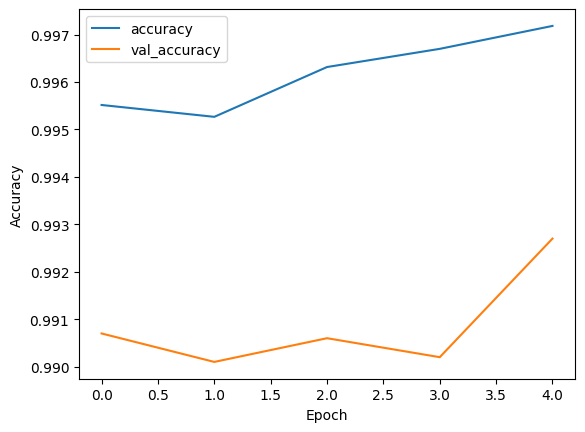

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

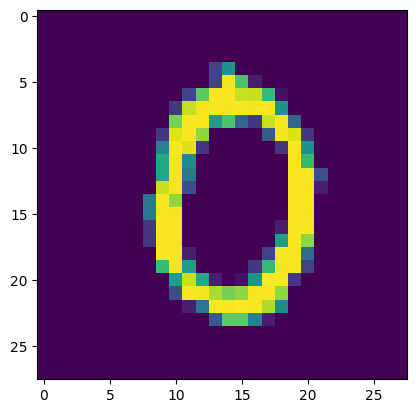

In [36]:
plt.imshow(x_test[157])

In [38]:
single_image = x_test[0] 
single_image = single_image.reshape(1, 28, 28, 1)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
prediction = model.predict(x_test[0].reshape(1,28,28,1))
predicted_class = np.argmax(prediction, axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [47]:
np.argmax(prediction, axis=1)

array([7], dtype=int64)

In [46]:
predicted_class

7

In [48]:
prediction


array([[5.3306282e-16, 3.4249499e-11, 1.2865481e-11, 7.9337337e-10,
        3.2295180e-11, 1.2708235e-13, 8.1041997e-19, 1.0000000e+00,
        5.3250425e-15, 2.7645723e-11]], dtype=float32)